In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("C:/Users/Ying Shan/OneDrive - Universiti Malaya/TFSN/Food Security-Final/FAOSTAT_data_en_9-30-2023.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42451 entries, 0 to 42450
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Domain Code      42451 non-null  object
 1   Domain           42451 non-null  object
 2   Area Code (M49)  42451 non-null  int64 
 3   Area             42451 non-null  object
 4   Element Code     42451 non-null  int64 
 5   Element          42451 non-null  object
 6   Item Code (CPC)  42451 non-null  object
 7   Item             42451 non-null  object
 8   Year Code        42451 non-null  int64 
 9   Year             42451 non-null  int64 
 10  Unit             42451 non-null  object
 11  Value            42451 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 3.9+ MB


In [79]:
print(df.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value'],
      dtype='object')


In [80]:
df['Unit'].unique()

array(['1000 t'], dtype=object)

In [81]:
columns_to_drop = ['Domain Code', 'Domain', 'Area Code (M49)', 'Item Code (CPC)', 'Element Code', 'Year Code', 'Unit']

df.drop(columns = columns_to_drop, axis=1, inplace = True)

print(df.columns)

Index(['Area', 'Element', 'Item', 'Year', 'Value'], dtype='object')


In [82]:
asia_countries = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Cambodia',
    'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of', 'Cyprus', "Democratic People's Republic of Korea",
    'Georgia', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan',
    'Kazakhstan', 'Kuwait', 'Kyrgyzstan', "Laos People's Democratic Republic", 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia',
    'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Republic of Korea', 
    'Saudi Arabia', 'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan',
    'Thailand', 'Timor-Leste', 'Türkiye', 'Turkmenistan', 'United Arab Emirates',
    'Uzbekistan', 'Viet Nam', 'Yemen'
]

df = df[df['Area'].isin(asia_countries)]

In [83]:
df.duplicated().sum()

0

In [84]:
df["Element"].unique()

array(['Production', 'Import Quantity', 'Export Quantity'], dtype=object)

In [85]:
df.isnull().sum()

Area       0
Element    0
Item       0
Year       0
Value      0
dtype: int64

In [86]:
df.head()

,Area,Element,Item,Year,Value
0,Afghanistan,Production,Wheat and products,2010,4532
1,Afghanistan,Production,Wheat and products,2011,3388
2,Afghanistan,Production,Wheat and products,2012,5050
3,Afghanistan,Production,Wheat and products,2013,5169
4,Afghanistan,Production,Wheat and products,2014,5370


In [87]:
df.shape

(10749, 5)

Calculating the self sufficiency ratio(SSR)

In [88]:
pivot_df = df.pivot(index=['Area', 'Item', 'Year'], columns='Element', values='Value').reset_index()
pivot_df.columns.name = None

print(pivot_df)

             Area                 Item  Year  Export Quantity   
0     Afghanistan  Barley and products  2010              NaN  \
1     Afghanistan  Barley and products  2011              NaN   
2     Afghanistan  Barley and products  2012              NaN   
3     Afghanistan  Barley and products  2013              NaN   
4     Afghanistan  Barley and products  2014              0.0   
...           ...                  ...   ...              ...   
4299        Yemen   Wheat and products  2016              2.0   
4300        Yemen   Wheat and products  2017              2.0   
4301        Yemen   Wheat and products  2018             87.0   
4302        Yemen   Wheat and products  2019            120.0   
4303        Yemen   Wheat and products  2020              2.0   

      Import Quantity  Production  
0                 3.0       437.0  
1                34.0       306.0  
2                15.0       504.0  
3                10.0       514.0  
4                11.0       521.0  
...

In [89]:
pivot_df.isnull().sum()

Area                  0
Item                  0
Year                  0
Export Quantity    1029
Import Quantity     180
Production          954
dtype: int64

In [90]:
columns_to_replace = ['Export Quantity', 'Import Quantity', 'Production']

pivot_df[columns_to_replace] = pivot_df[columns_to_replace].fillna(0)

print(pivot_df)

             Area                 Item  Year  Export Quantity   
0     Afghanistan  Barley and products  2010              0.0  \
1     Afghanistan  Barley and products  2011              0.0   
2     Afghanistan  Barley and products  2012              0.0   
3     Afghanistan  Barley and products  2013              0.0   
4     Afghanistan  Barley and products  2014              0.0   
...           ...                  ...   ...              ...   
4299        Yemen   Wheat and products  2016              2.0   
4300        Yemen   Wheat and products  2017              2.0   
4301        Yemen   Wheat and products  2018             87.0   
4302        Yemen   Wheat and products  2019            120.0   
4303        Yemen   Wheat and products  2020              2.0   

      Import Quantity  Production  
0                 3.0       437.0  
1                34.0       306.0  
2                15.0       504.0  
3                10.0       514.0  
4                11.0       521.0  
...

In [91]:
pivot_df['SSR'] = (pivot_df['Production'] * 100) / (pivot_df['Production'] + pivot_df['Import Quantity'] - pivot_df['Export Quantity'])

print(pivot_df)

             Area                 Item  Year  Export Quantity   
0     Afghanistan  Barley and products  2010              0.0  \
1     Afghanistan  Barley and products  2011              0.0   
2     Afghanistan  Barley and products  2012              0.0   
3     Afghanistan  Barley and products  2013              0.0   
4     Afghanistan  Barley and products  2014              0.0   
...           ...                  ...   ...              ...   
4299        Yemen   Wheat and products  2016              2.0   
4300        Yemen   Wheat and products  2017              2.0   
4301        Yemen   Wheat and products  2018             87.0   
4302        Yemen   Wheat and products  2019            120.0   
4303        Yemen   Wheat and products  2020              2.0   

      Import Quantity  Production        SSR  
0                 3.0       437.0  99.318182  
1                34.0       306.0  90.000000  
2                15.0       504.0  97.109827  
3                10.0       514

In [92]:
pivot_df.head()

,Area,Item,Year,Export Quantity,Import Quantity,Production,SSR
0,Afghanistan,Barley and products,2010,0.0,3.0,437.0,99.318182
1,Afghanistan,Barley and products,2011,0.0,34.0,306.0,90.000000
2,Afghanistan,Barley and products,2012,0.0,15.0,504.0,97.109827
3,Afghanistan,Barley and products,2013,0.0,10.0,514.0,98.091603
4,Afghanistan,Barley and products,2014,0.0,11.0,521.0,97.932331


In [93]:
pivot_df['SSR'].isnull().sum()

940

In [94]:
pivot_df.dropna(subset=['SSR'], inplace=True)
pivot_df['SSR'].isnull().sum()

0

Price index

In [95]:
file_path = 'C:/Users/Ying Shan/OneDrive - Universiti Malaya/TFSN/Food Security-Final/pivot_df.csv'

pivot_df.to_csv(file_path, index=False)

In [96]:
df_price = pd.read_csv('C:/Users/Ying Shan/OneDrive - Universiti Malaya/TFSN/Food Security-Final/Food_price_indices_data_sep707.csv')
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              404 non-null    object 
 1   Food Price Index  404 non-null    float64
 2   Meat              404 non-null    float64
 3   Dairy             404 non-null    float64
 4   Cereals           404 non-null    float64
 5   Oils              404 non-null    float64
 6   Sugar             404 non-null    float64
 7   Unnamed: 7        0 non-null      float64
 8   Unnamed: 8        0 non-null      float64
 9   Unnamed: 9        0 non-null      float64
 10  Unnamed: 10       0 non-null      float64
 11  Unnamed: 11       0 non-null      float64
 12  Unnamed: 12       0 non-null      float64
 13  Unnamed: 13       0 non-null      float64
 14  Unnamed: 14       0 non-null      float64
 15  Unnamed: 15       0 non-null      float64
 16  Unnamed: 16       0 non-null      float64
 1

In [97]:
df_price = df_price.drop(df_price.columns[7:], axis=1)
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              404 non-null    object 
 1   Food Price Index  404 non-null    float64
 2   Meat              404 non-null    float64
 3   Dairy             404 non-null    float64
 4   Cereals           404 non-null    float64
 5   Oils              404 non-null    float64
 6   Sugar             404 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.2+ KB


In [98]:
df_price.head()

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
0,1990-01,64.1,73.4,53.5,64.1,44.59,87.9
1,1990-02,64.5,76.0,52.2,62.2,44.50,90.7
2,1990-03,63.8,77.8,41.4,61.3,45.75,95.1
3,1990-04,65.8,80.4,48.4,62.8,44.02,94.3
4,1990-05,64.4,81.0,39.2,62.0,45.50,90.4


In [99]:
df_price['Date'] = pd.to_datetime(df_price['Date'])
filtered_df = df_price[(df_price['Date'].dt.year >= 2010) & (df_price['Date'].dt.year <= 2020)]

average_cereals_price_index = filtered_df.groupby(filtered_df['Date'].dt.year)['Cereals'].mean()

df_price = pd.DataFrame({'Year': average_cereals_price_index.index, 'Average Cereals Price Index': average_cereals_price_index.values})

print(df_price)

    Year  Average Cereals Price Index
0   2010                   107.508333
1   2011                   142.150000
2   2012                   137.400000
3   2013                   129.116667
4   2014                   115.825000
5   2015                    95.875000
6   2016                    88.316667
7   2017                    90.983333
8   2018                   100.816667
9   2019                    96.600000
10  2020                   103.108333


In [100]:
# Merge based on common columns 'Area' and 'Year'
merged_df = pivot_df.merge(df_price, on=['Year'], how='inner')
merged_df.head()

,Area,Item,Year,Export Quantity,Import Quantity,Production,SSR,Average Cereals Price Index
0,Afghanistan,Barley and products,2010,0.0,3.0,437.0,99.318182,107.508333
1,Afghanistan,Maize and products,2010,0.0,0.0,301.0,100.000000,107.508333
2,Afghanistan,Millet and products,2010,0.0,0.0,15.0,100.000000,107.508333
3,Afghanistan,Rice and products,2010,0.0,60.0,672.0,91.803279,107.508333
4,Afghanistan,Wheat and products,2010,0.0,1860.0,4532.0,70.901126,107.508333


In [101]:
file_path = 'C:/Users/Ying Shan/OneDrive - Universiti Malaya/TFSN/Food Security-Final/food_security.csv'

merged_df.to_csv(file_path, index=False)

Other factors

In [102]:
df_other = pd.read_csv("C:/Users/Ying Shan/OneDrive - Universiti Malaya/TFSN/Food Security-Final/FAOSTAT_data_en_9-30-2023 (1).csv")
df_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76748 entries, 0 to 76747
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   76748 non-null  object
 1   Area     76748 non-null  object
 2   Element  76748 non-null  object
 3   Item     76748 non-null  object
 4   Year     76748 non-null  object
 5   Unit     76748 non-null  object
 6   Value    69399 non-null  object
dtypes: object(7)
memory usage: 4.1+ MB


In [103]:
print(df_other.columns)

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')


In [104]:
df_other.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Suite of Food Security Indicators,Afghanistan,Value,Average dietary energy supply adequacy (percen...,2009-2011,%,104
1,Suite of Food Security Indicators,Afghanistan,Value,Average dietary energy supply adequacy (percen...,2010-2012,%,106
2,Suite of Food Security Indicators,Afghanistan,Value,Average dietary energy supply adequacy (percen...,2011-2013,%,105
3,Suite of Food Security Indicators,Afghanistan,Value,Average dietary energy supply adequacy (percen...,2012-2014,%,107
4,Suite of Food Security Indicators,Afghanistan,Value,Average dietary energy supply adequacy (percen...,2013-2015,%,108


In [105]:
df_other['Unit'].unique()

array(['%', 'g/pc/d', 'I$', 'million No', 'Index', '1000 I$', 'kcal/pc/d',
       'No', 'km'], dtype=object)

In [106]:
df_other['Item'] = df_other['Item'] + ' (' + df_other['Unit'] + ')'

df_other = df_other.drop(columns=['Unit'])

In [107]:
df_other.duplicated().sum()

0

In [108]:
df_other.isnull().sum()

Domain        0
Area          0
Element       0
Item          0
Year          0
Value      7349
dtype: int64

In [109]:
column_to_drop = ['Domain', 'Element']

df_other.drop(columns = column_to_drop, axis = 1, inplace = True)

df_other.head()

,Area,Item,Year,Value
0,Afghanistan,Average dietary energy supply adequacy (percen...,2009-2011,104
1,Afghanistan,Average dietary energy supply adequacy (percen...,2010-2012,106
2,Afghanistan,Average dietary energy supply adequacy (percen...,2011-2013,105
3,Afghanistan,Average dietary energy supply adequacy (percen...,2012-2014,107
4,Afghanistan,Average dietary energy supply adequacy (percen...,2013-2015,108


In [110]:
def convert_year_range(year_range):
    years = year_range.split('-')
    if len(years) == 2:
        start_year, end_year = map(int, years)
        middle_year = (start_year + end_year) // 2
        return str(middle_year)
    else:
        return year_range

# Apply the function to the 'Year' column
df_other['Year'] = df_other['Year'].apply(convert_year_range)

df_other

,Area,Item,Year,Value
0,Afghanistan,Average dietary energy supply adequacy (percen...,2010,104
1,Afghanistan,Average dietary energy supply adequacy (percen...,2011,106
2,Afghanistan,Average dietary energy supply adequacy (percen...,2012,105
3,Afghanistan,Average dietary energy supply adequacy (percen...,2013,107
4,Afghanistan,Average dietary energy supply adequacy (percen...,2014,108
...,...,...,...,...
76743,Zimbabwe,Average fat supply (g/cap/day) (3-year average...,2015,69.9
76744,Zimbabwe,Average fat supply (g/cap/day) (3-year average...,2016,68.6
76745,Zimbabwe,Average fat supply (g/cap/day) (3-year average...,2017,66.9
76746,Zimbabwe,Average fat supply (g/cap/day) (3-year average...,2018,63.6


In [111]:
df_other.isnull().sum()

Area        0
Item        0
Year        0
Value    7349
dtype: int64

In [112]:
df_other.dropna(inplace=True)
df_other.isnull().sum()

Area     0
Item     0
Year     0
Value    0
dtype: int64

In [113]:
duplicate_rows = df_other[df_other.duplicated(['Area', 'Item', 'Year'], keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [Area, Item, Year, Value]
Index: []


In [114]:
pivoted_df = df_other.pivot(index=['Area', 'Year'], columns='Item', values='Value').reset_index()
pivoted_df = pivoted_df.fillna(np.nan)
pivoted_df

Item,Area,Year,Average dietary energy requirement (kcal/cap/day) (kcal/pc/d),Average dietary energy supply adequacy (percent) (3-year average) (%),Average fat supply (g/cap/day) (3-year average) (g/pc/d),Average protein supply (g/cap/day) (3-year average) (g/pc/d),Average supply of protein of animal origin (g/cap/day) (3-year average) (g/pc/d),Cereal import dependency ratio (percent) (3-year average) (%),Coefficient of variation of habitual caloric consumption distribution (real number) (No),"Gross domestic product per capita, PPP, (constant 2017 international $) (I$)",...,Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average) (%),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average) (%),Prevalence of obesity in the adult population (18 years and older) (%),Prevalence of severe food insecurity in the female adult population (percent) (3-year average) (%),Prevalence of severe food insecurity in the male adult population (percent) (3-year average) (%),Prevalence of severe food insecurity in the total population (percent) (3-year average) (%),Prevalence of undernourishment (percent) (3-year average) (%),Rail lines density (total route in km per 100 square km of land area) (km),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average) (%)",Value of food imports in total merchandise exports (percent) (3-year average) (%)
0,Afghanistan,2010,2057,104,34.1,58,11,29.1,0.25,2026.2,...,NaN,NaN,4,NaN,NaN,NaN,20.5,NaN,76,311
1,Afghanistan,2011,2067,106,36,58,11,26.7,0.26,1961.1,...,NaN,NaN,4.2,NaN,NaN,NaN,19.7,NaN,74,343
2,Afghanistan,2012,2078,105,36.1,57.3,11,26.2,0.27,2122.8,...,NaN,NaN,4.4,NaN,NaN,NaN,21,NaN,73,342
3,Afghanistan,2013,2085,107,38.4,58,11.7,21,0.28,2165.3,...,NaN,NaN,4.7,NaN,NaN,NaN,20.8,NaN,72,383
4,Afghanistan,2014,2093,108,39,58.3,12,23.2,0.29,2144.4,...,NaN,NaN,4.9,NaN,NaN,NaN,20.7,NaN,72,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,Zimbabwe,2016,2215,95,68.6,58,26,48,0.32,2286.6,...,65.7,66.7,15.5,37.6,35.9,36.7,35.1,NaN,53,25
2240,Zimbabwe,2017,2219,94,66.9,57.7,25.3,35.3,0.32,2331.8,...,65.4,67,NaN,37.1,34.6,35.9,36.3,NaN,53,20
2241,Zimbabwe,2018,2224,92,63.6,55.6,25,56.9,0.32,2399.6,...,65.3,66.7,NaN,35.8,32.5,34.2,38.2,0.8,53,13
2242,Zimbabwe,2019,2229,91,63.3,54.7,24.7,60.3,0.31,2203.4,...,68.3,69.8,NaN,33.7,30.6,32.1,38.9,0.8,53,14


In [115]:
file_path = 'C:/Users/Ying Shan/OneDrive - Universiti Malaya/TFSN/Food Security-Final/food_security_other.csv'

pivoted_df.to_csv(file_path, index=False) 

In [116]:
df = pd.read_csv('C:/Users/Ying Shan/OneDrive - Universiti Malaya/TFSN/Food Security-Final/food_security.csv')
df_1 = pd.read_csv('C:/Users/Ying Shan/OneDrive - Universiti Malaya/TFSN/Food Security-Final/food_security_other.csv')

In [117]:
df = df.merge(df_1, on=['Area', 'Year'], how='inner')
df = df[df['Item'] != 'Cereals, Other']

df.head()

,Area,Item,Year,Export Quantity,Import Quantity,Production,SSR,Average Cereals Price Index,Average dietary energy requirement (kcal/cap/day) (kcal/pc/d),Average dietary energy supply adequacy (percent) (3-year average) (%),...,Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average) (%),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average) (%),Prevalence of obesity in the adult population (18 years and older) (%),Prevalence of severe food insecurity in the female adult population (percent) (3-year average) (%),Prevalence of severe food insecurity in the male adult population (percent) (3-year average) (%),Prevalence of severe food insecurity in the total population (percent) (3-year average) (%),Prevalence of undernourishment (percent) (3-year average) (%),Rail lines density (total route in km per 100 square km of land area) (km),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average) (%)",Value of food imports in total merchandise exports (percent) (3-year average) (%)
0,Afghanistan,Barley and products,2010,0.0,3.0,437.0,99.318182,107.508333,2057.0,104.0,...,NaN,NaN,4.0,NaN,NaN,NaN,20.5,NaN,76.0,311.0
1,Afghanistan,Maize and products,2010,0.0,0.0,301.0,100.000000,107.508333,2057.0,104.0,...,NaN,NaN,4.0,NaN,NaN,NaN,20.5,NaN,76.0,311.0
2,Afghanistan,Millet and products,2010,0.0,0.0,15.0,100.000000,107.508333,2057.0,104.0,...,NaN,NaN,4.0,NaN,NaN,NaN,20.5,NaN,76.0,311.0
3,Afghanistan,Rice and products,2010,0.0,60.0,672.0,91.803279,107.508333,2057.0,104.0,...,NaN,NaN,4.0,NaN,NaN,NaN,20.5,NaN,76.0,311.0
4,Afghanistan,Wheat and products,2010,0.0,1860.0,4532.0,70.901126,107.508333,2057.0,104.0,...,NaN,NaN,4.0,NaN,NaN,NaN,20.5,NaN,76.0,311.0


In [118]:
df.isnull().sum()

Area                                                                                                                 0
Item                                                                                                                 0
Year                                                                                                                 0
Export Quantity                                                                                                      0
Import Quantity                                                                                                      0
Production                                                                                                           0
SSR                                                                                                                  0
Average Cereals Price Index                                                                                          0
Average dietary energy requirement (kcal/cap/day

In [119]:
file_path = 'C:/Users/Ying Shan/OneDrive - Universiti Malaya/TFSN/Food Security-Final/food_security_data.csv'

df.to_csv(file_path, index=False) 

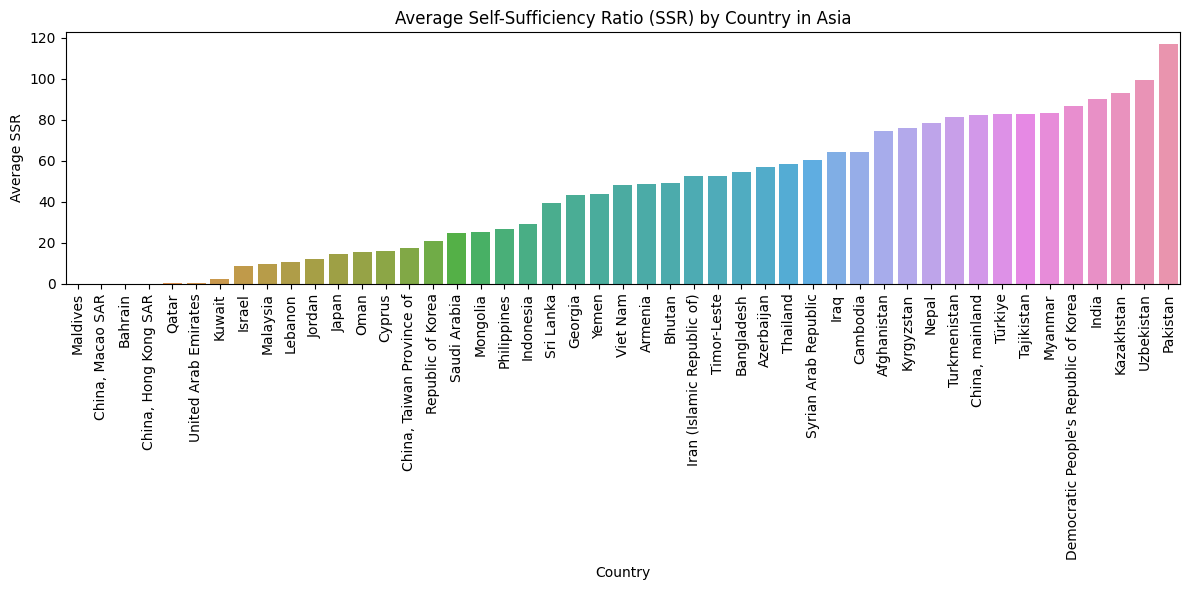

In [120]:
# Assuming you have a DataFrame named pivot_df with 'Area' and 'SSR' columns
# Calculate the average SSR for each country
average_ssr_by_country = df.groupby('Area')['SSR'].mean().reset_index()

# Sort the DataFrame by 'SSR' column in ascending order
average_ssr_by_country = average_ssr_by_country.sort_values(by='SSR', ascending=True)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_ssr_by_country, x='Area', y='SSR')
plt.xlabel('Country')
plt.ylabel('Average SSR')
plt.title('Average Self-Sufficiency Ratio (SSR) by Country in Asia')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

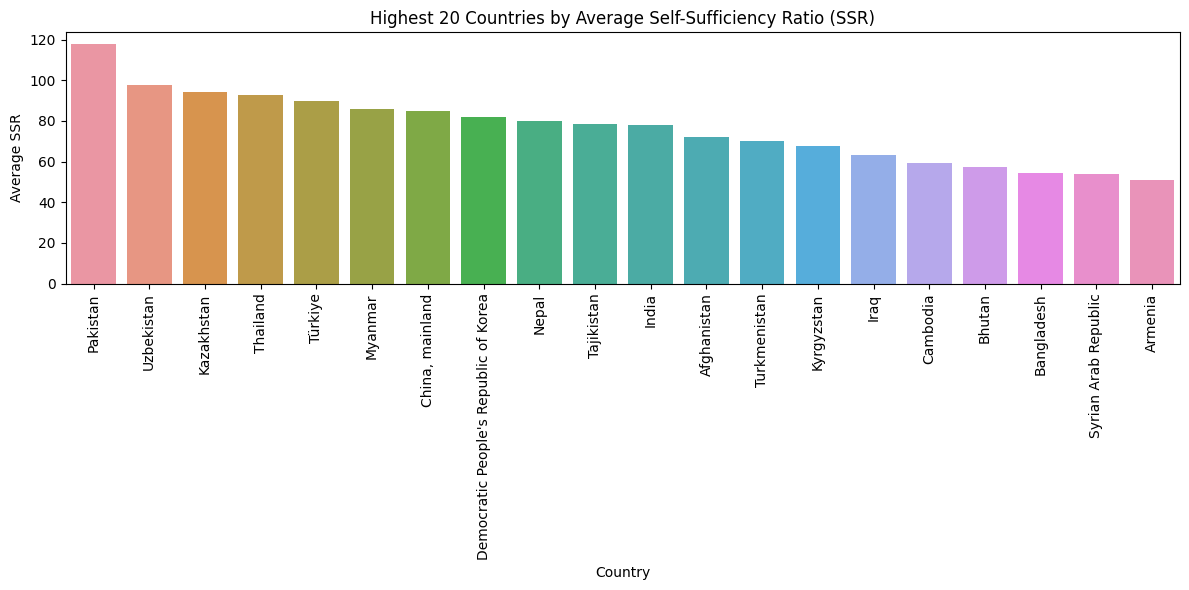

In [121]:
# Assuming you have a DataFrame named pivot_df with 'Area' and 'SSR' columns
# Calculate the average SSR for each country
average_ssr_by_country = pivot_df.groupby('Area')['SSR'].mean().reset_index()

# Sort the DataFrame by 'SSR' column in descending order to get the highest SSR values first
average_ssr_by_country = average_ssr_by_country.sort_values(by='SSR', ascending=False)

# Select the highest 20 countries
highest_20_ssr_countries = average_ssr_by_country.head(20)

# Create a bar plot for the highest 20 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_20_ssr_countries, x='Area', y='SSR')
plt.xlabel('Country')
plt.ylabel('Average SSR')
plt.title('Highest 20 Countries by Average Self-Sufficiency Ratio (SSR)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


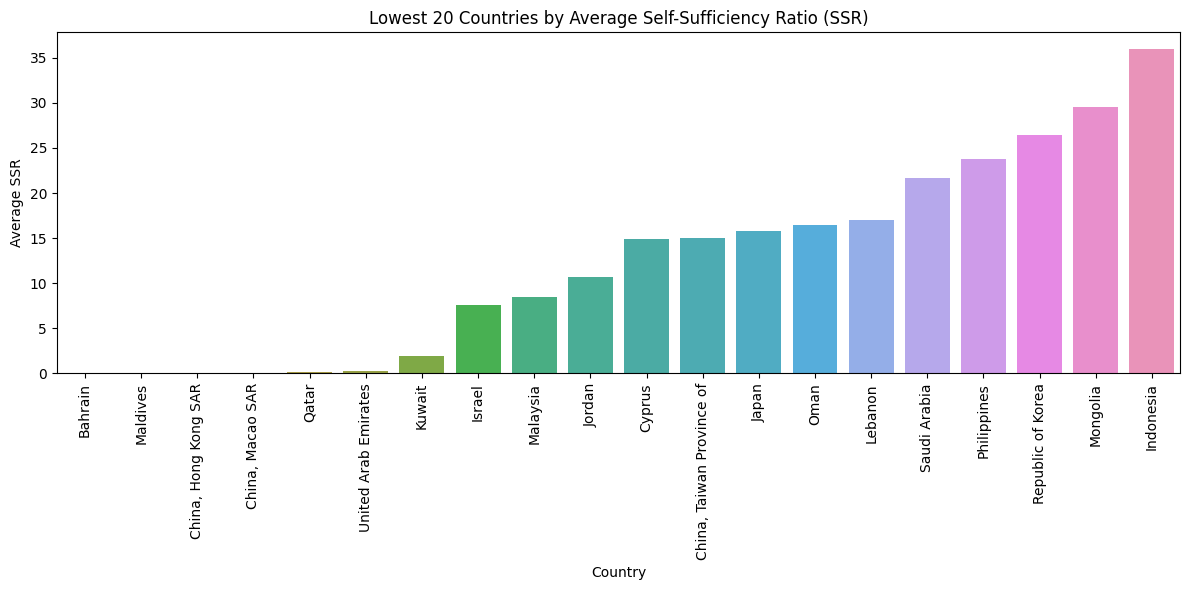

In [122]:
# Assuming you have a DataFrame named pivot_df with 'Area' and 'SSR' columns
# Calculate the average SSR for each country
average_ssr_by_country = pivot_df.groupby('Area')['SSR'].mean().reset_index()

# Sort the DataFrame by 'SSR' column in ascending order
average_ssr_by_country = average_ssr_by_country.sort_values(by='SSR', ascending=True)

# Select the lowest 20 countries
lowest_20_ssr_countries = average_ssr_by_country.head(20)

# Create a bar plot for the lowest 20 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=lowest_20_ssr_countries, x='Area', y='SSR')
plt.xlabel('Country')
plt.ylabel('Average SSR')
plt.title('Lowest 20 Countries by Average Self-Sufficiency Ratio (SSR)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


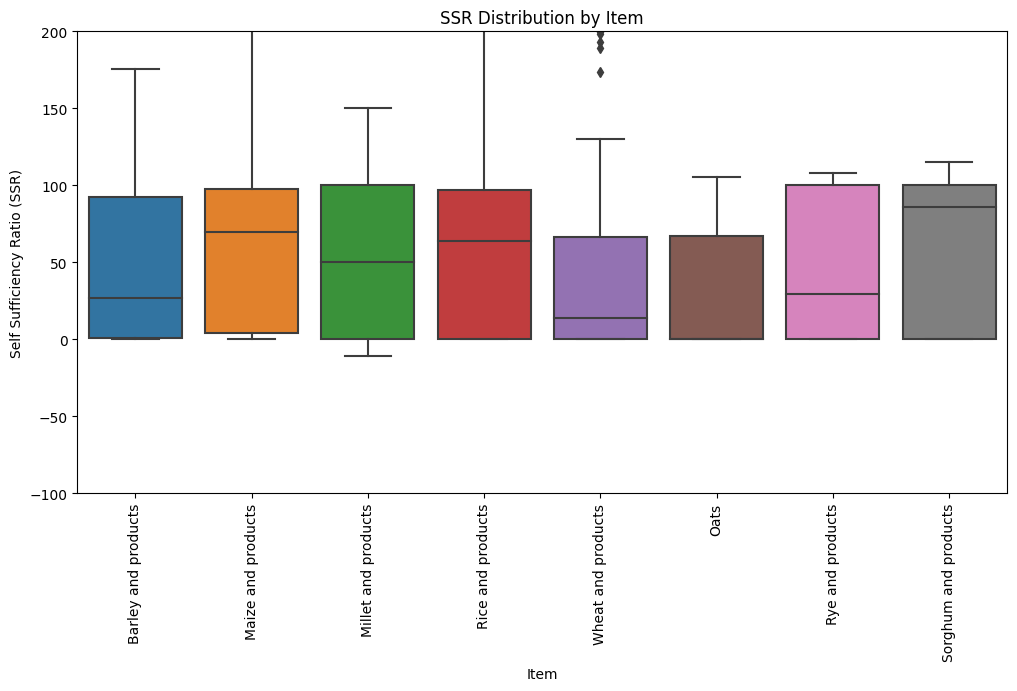

In [123]:
# Create a box plot of SSR values by item
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Item', y='SSR')
plt.xticks(rotation=90)
plt.xlabel('Item')
plt.ylabel('Self Sufficiency Ratio (SSR)')
plt.title('SSR Distribution by Item')
plt.ylim(-100, 200)
plt.show()

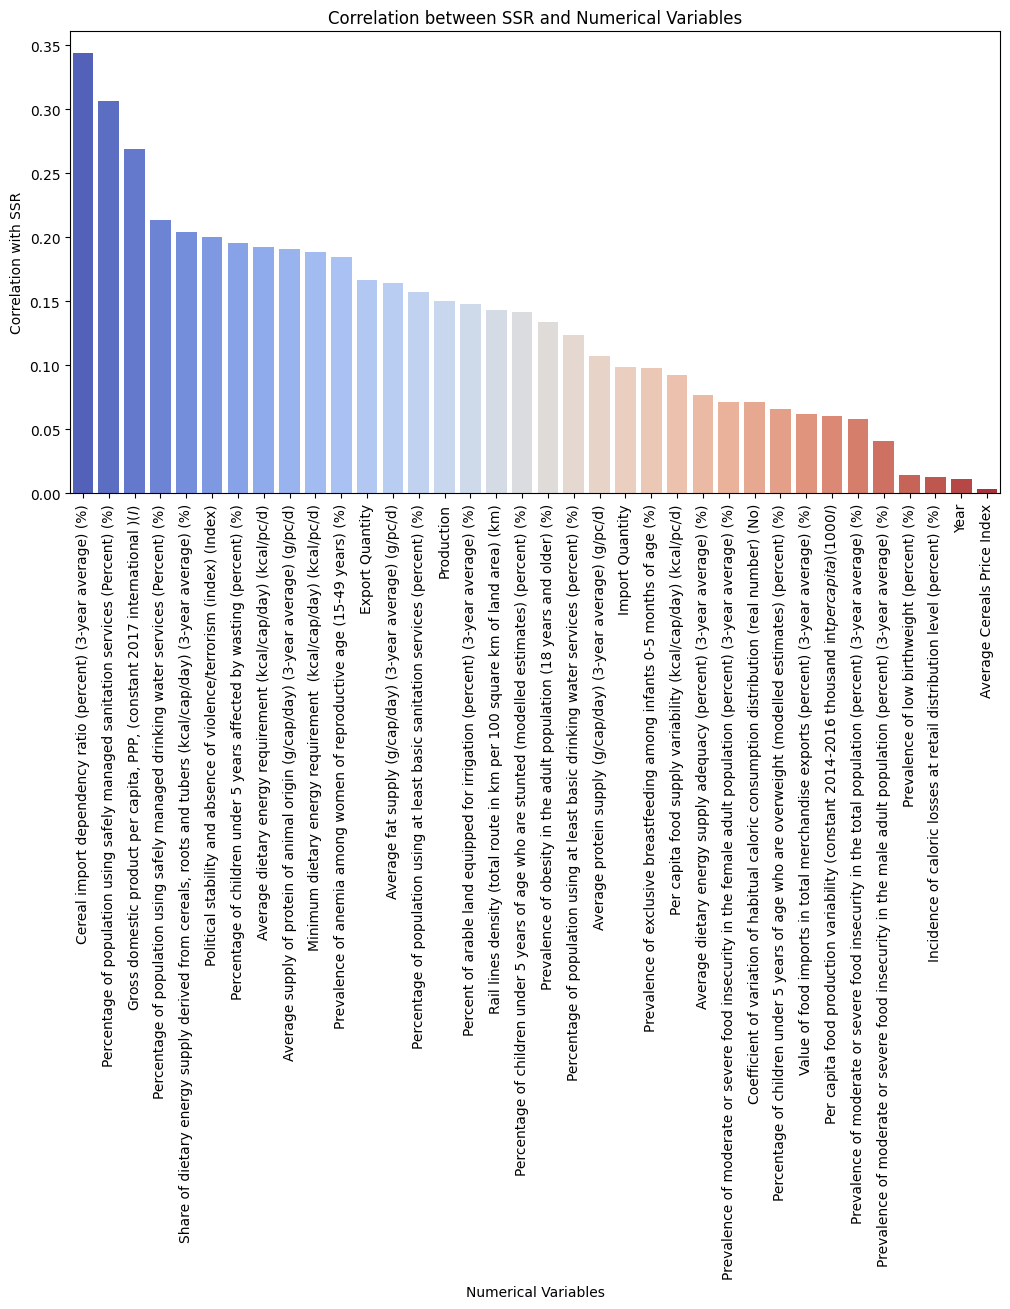

In [124]:
# Select numerical columns excluding 'Area'
numerical_columns = df.select_dtypes(include=['number'])

# Calculate the correlation of 'SSR' with other numerical columns
corr_with_ssr = numerical_columns.corr()['SSR'].drop('SSR')  # Drop 'SSR' itself from the list

# Sort correlations in descending order
corr_with_ssr_sorted = corr_with_ssr.abs().sort_values(ascending=False)

# Create a bar plot to visualize correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=corr_with_ssr_sorted.index, y=corr_with_ssr_sorted.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Numerical Variables')
plt.ylabel('Correlation with SSR')
plt.title('Correlation between SSR and Numerical Variables')
plt.show()


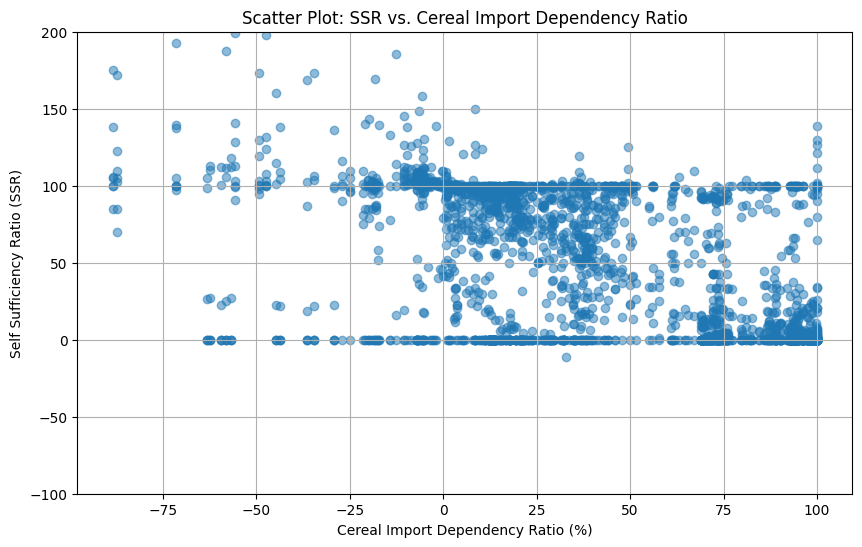

In [125]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Cereal import dependency ratio (percent) (3-year average) (%)'], df['SSR'], alpha=0.5)
plt.xlabel('Cereal Import Dependency Ratio (%)')
plt.ylabel('Self Sufficiency Ratio (SSR)')
plt.ylim(-100,200)
plt.title('Scatter Plot: SSR vs. Cereal Import Dependency Ratio')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Scatter Plot: SSR vs. GDP per Capita (Worldwide)')

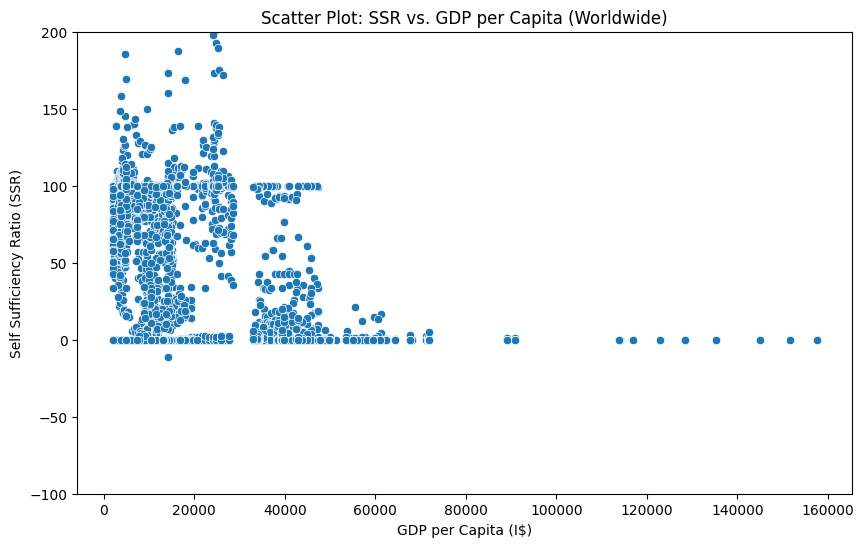

In [126]:
# Create a scatter plot between SSR and another numerical variable (e.g., GDP per capita)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Gross domestic product per capita, PPP, (constant 2017 international $) (I$)', y='SSR')
plt.xlabel('GDP per Capita (I$)')
plt.ylabel('Self Sufficiency Ratio (SSR)')
plt.ylim(-100, 200)
plt.title('Scatter Plot: SSR vs. GDP per Capita (Worldwide)')

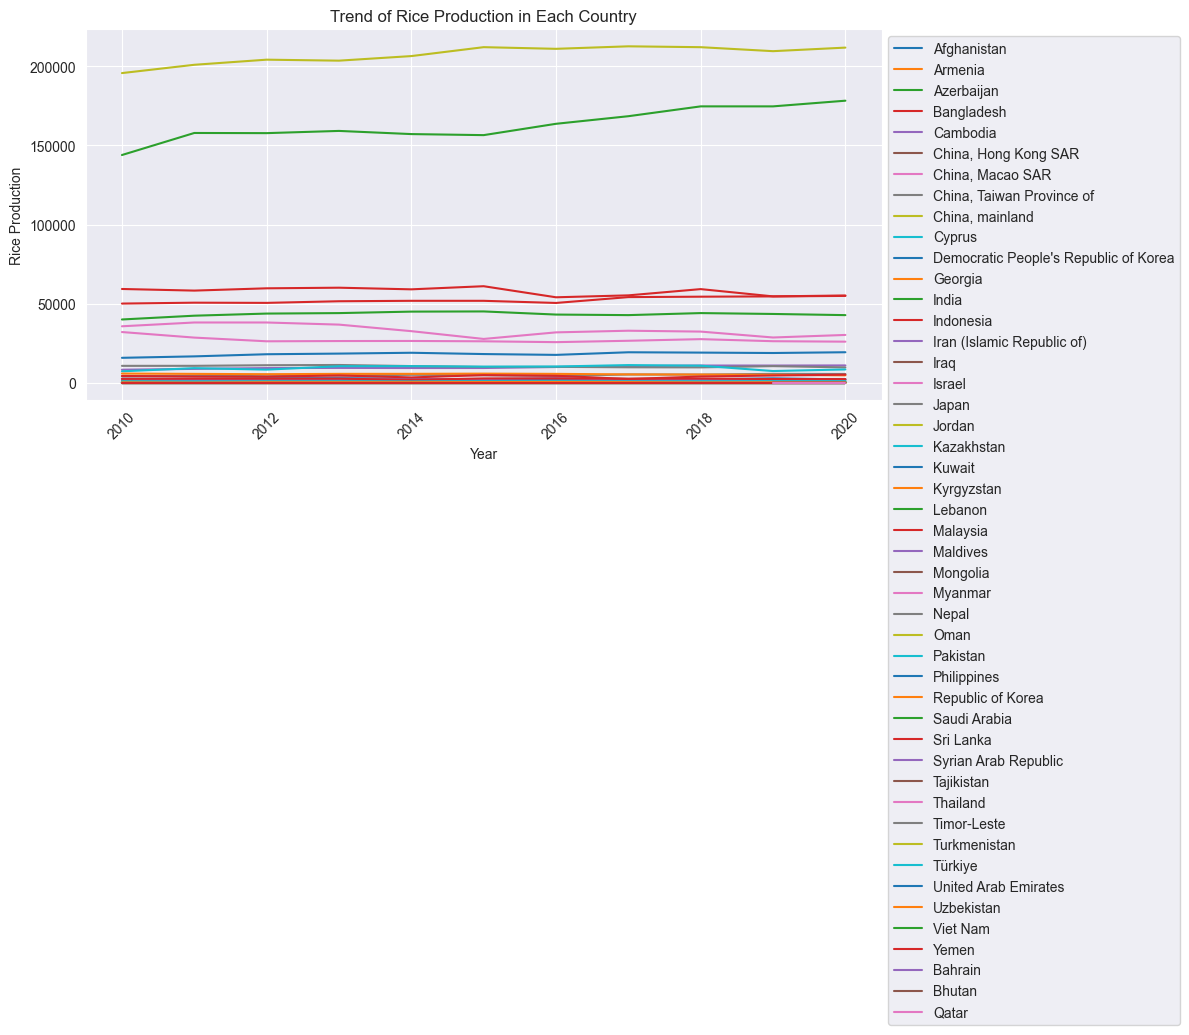

In [127]:
# Filter the DataFrame for rows where the 'Item' is 'Rice and products'
rice_production_df = df[df['Item'] == 'Rice and products']

# Set the style of the plot
sns.set_style("darkgrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Loop through unique countries and plot the production trend for each
for country in rice_production_df['Area'].unique():
    country_data = rice_production_df[rice_production_df['Area'] == country]
    plt.plot(country_data['Year'], country_data['Production'], label=country)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.title('Trend of Rice Production in Each Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


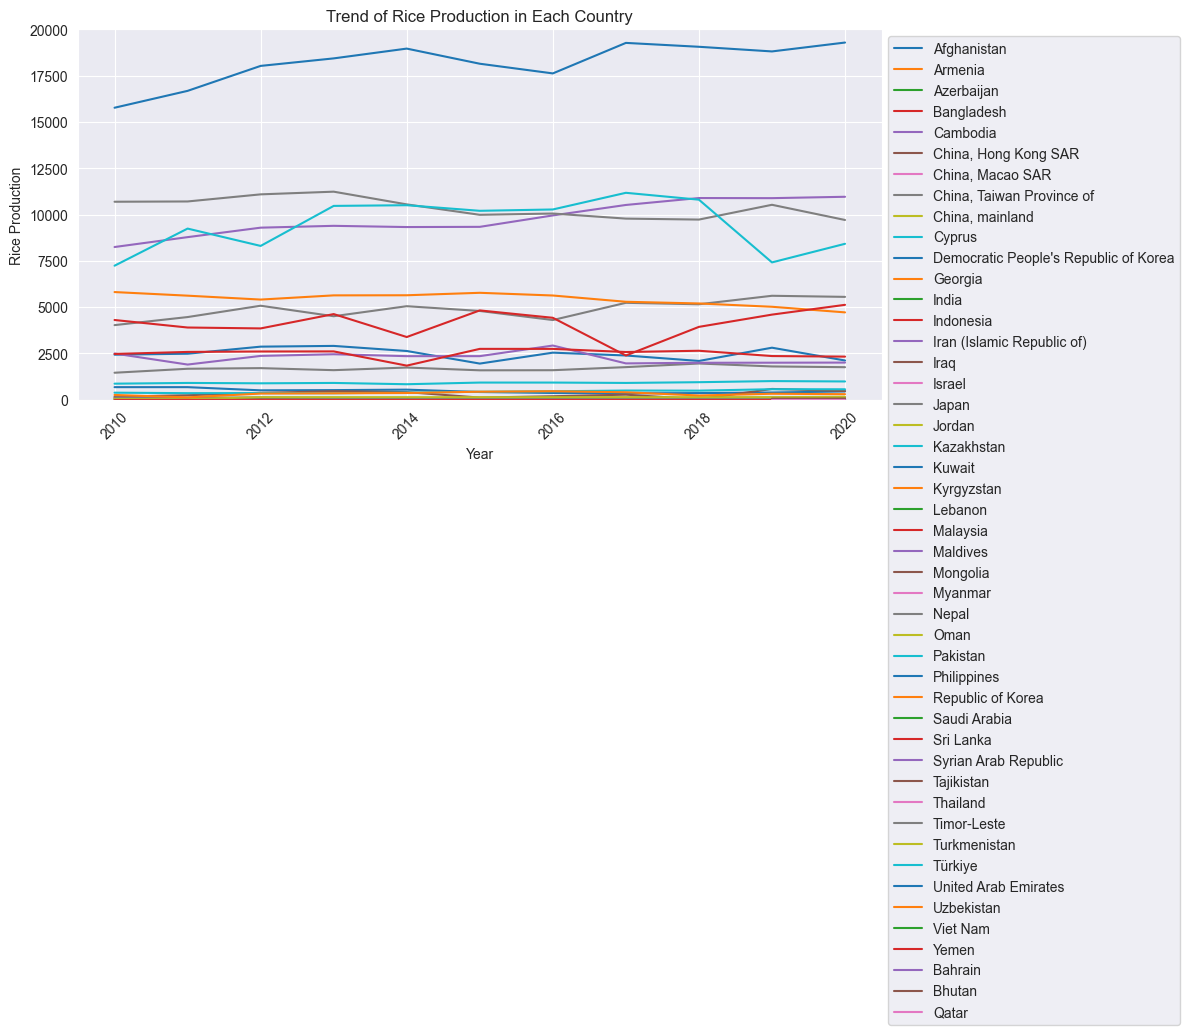

In [128]:
# Filter the DataFrame for rows where the 'Item' is 'Rice and products'
rice_production_df = df[df['Item'] == 'Rice and products']

# Set the style of the plot
sns.set_style("darkgrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Loop through unique countries and plot the production trend for each
for country in rice_production_df['Area'].unique():
    country_data = rice_production_df[rice_production_df['Area'] == country]
    plt.plot(country_data['Year'], country_data['Production'], label=country)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.ylim(0,20000)
plt.title('Trend of Rice Production in Each Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


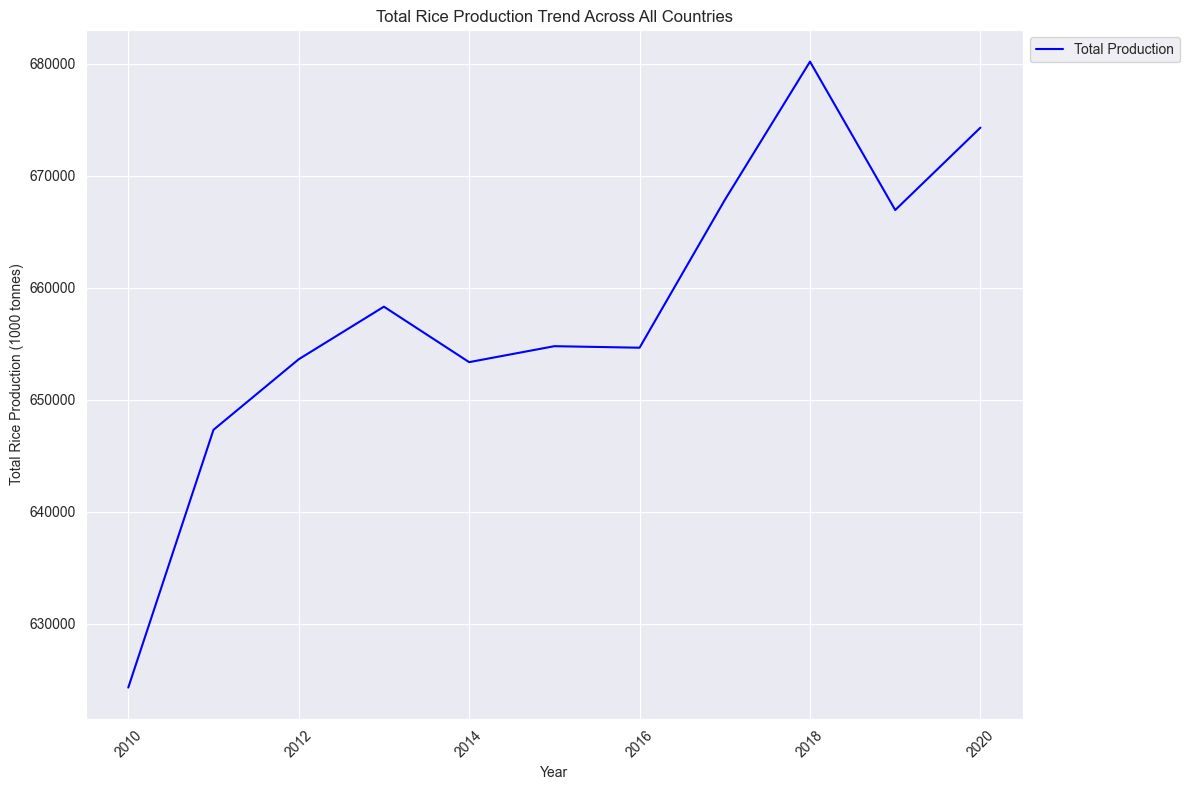

In [129]:
# Filter the DataFrame for rows where the 'Item' is 'Rice and products'
rice_production_df = df[df['Item'] == 'Rice and products']

# Calculate the total production for each year (unit: 1000 tonnes)
total_production_per_year = rice_production_df.groupby('Year')['Production'].sum().reset_index()

# Set the style of the plot
sns.set_style("darkgrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot the total production trend
plt.plot(total_production_per_year['Year'], total_production_per_year['Production'], label='Total Production', color='blue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Rice Production (1000 tonnes)')
plt.title('Total Rice Production Trend Across All Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

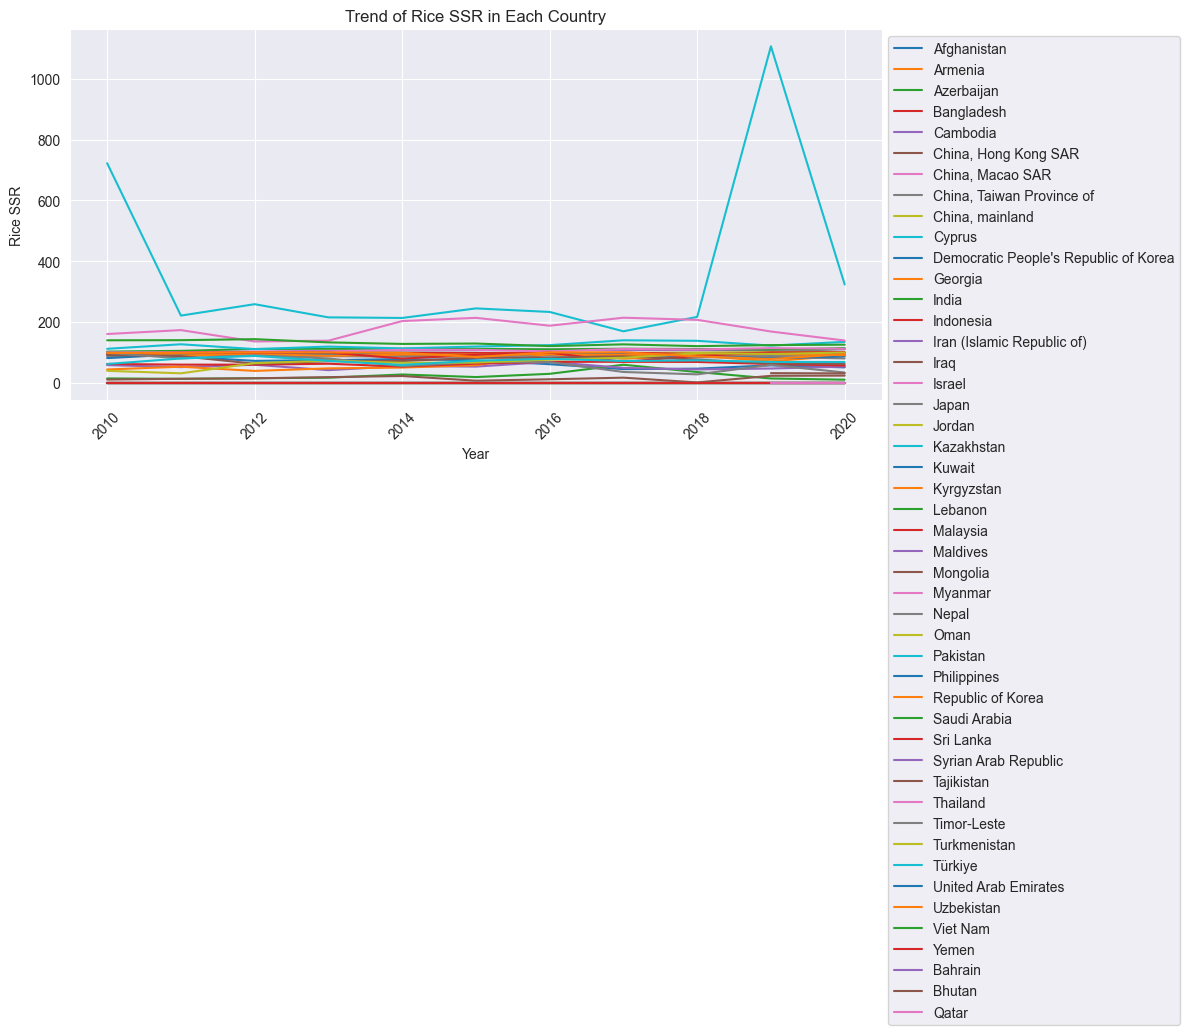

In [133]:
rice_ssr_df = df[df['Item'] == 'Rice and products']

total_production_per_year = rice_production_df.groupby('Year')['Production'].sum().reset_index()

sns.set_style("darkgrid")

plt.figure(figsize=(12, 8))
ax = plt.gca()

for country in rice_ssr_df['Area'].unique():
    country_data = rice_ssr_df[rice_ssr_df['Area'] == country]
    plt.plot(country_data['Year'], country_data['SSR'], label=country)

plt.xlabel('Year')
plt.ylabel('Rice SSR')
plt.title('Trend of Rice SSR in Each Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

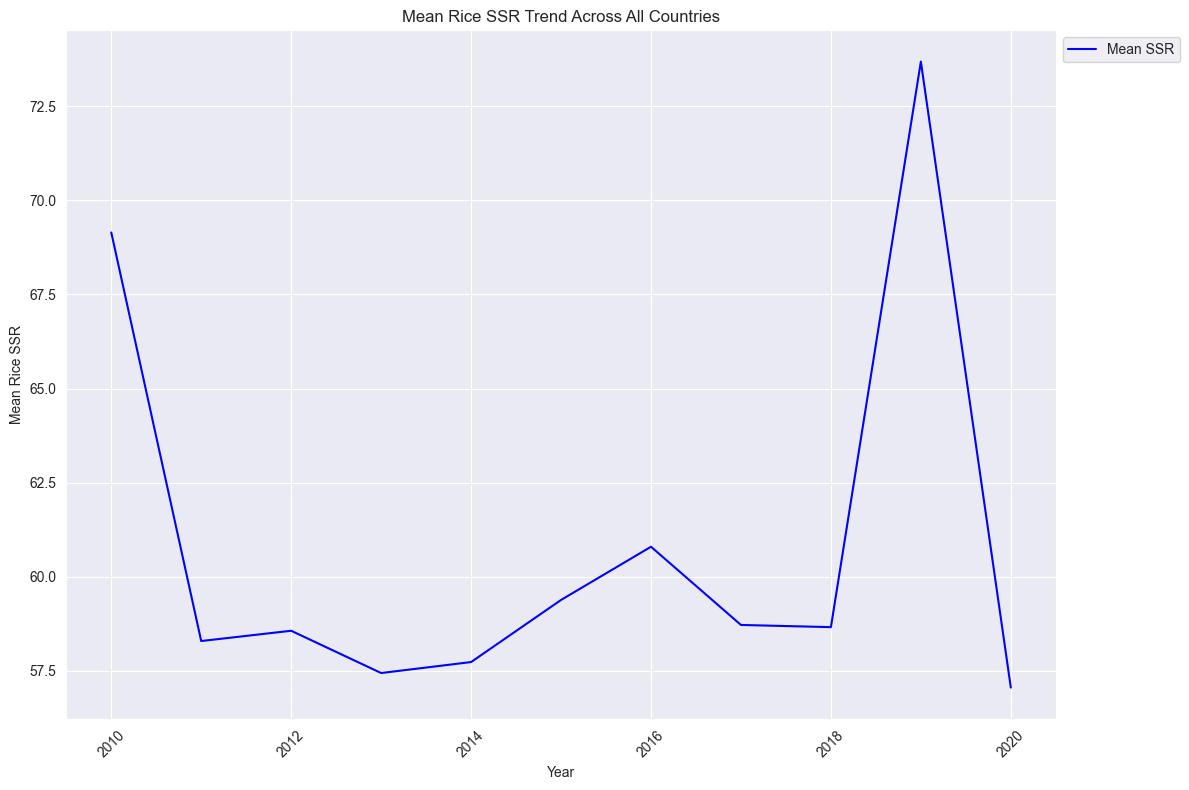

In [162]:
# Filter the DataFrame for rows where the 'Item' is 'Rice and products'
rice_ssr_df = df[df['Item'] == 'Rice and products']

# Calculate the mean ssr for each year
mean_ssr_per_year = rice_ssr_df.groupby('Year')['SSR'].mean().reset_index()

# Set the style of the plot
sns.set_style("darkgrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot the mean ssr trend
plt.plot(mean_ssr_per_year['Year'], mean_ssr_per_year['SSR'], label='Mean SSR', color='blue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Mean Rice SSR')
plt.title('Mean Rice SSR Trend Across All Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

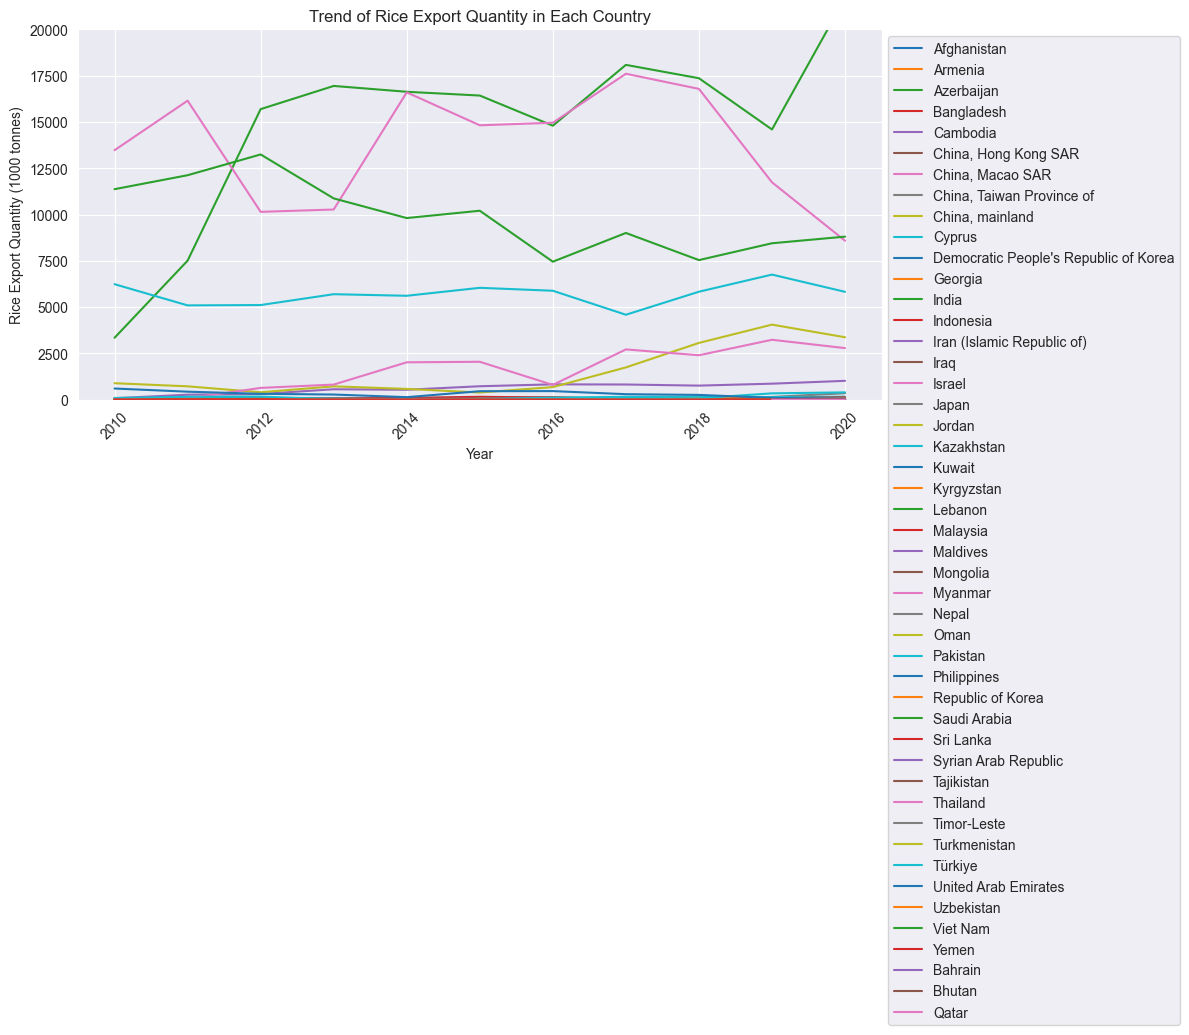

In [161]:
# Filter the DataFrame for rows where the 'Item' is 'Rice and products'
rice_production_df = df[df['Item'] == 'Rice and products']

# Set the style of the plot
sns.set_style("darkgrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Loop through unique countries and plot the export trend for each
for country in rice_production_df['Area'].unique():
    country_data = rice_production_df[rice_production_df['Area'] == country]
    plt.plot(country_data['Year'], country_data['Export Quantity'], label=country)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rice Export Quantity (1000 tonnes)')
plt.ylim(0,20000)
plt.title('Trend of Rice Export Quantity in Each Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

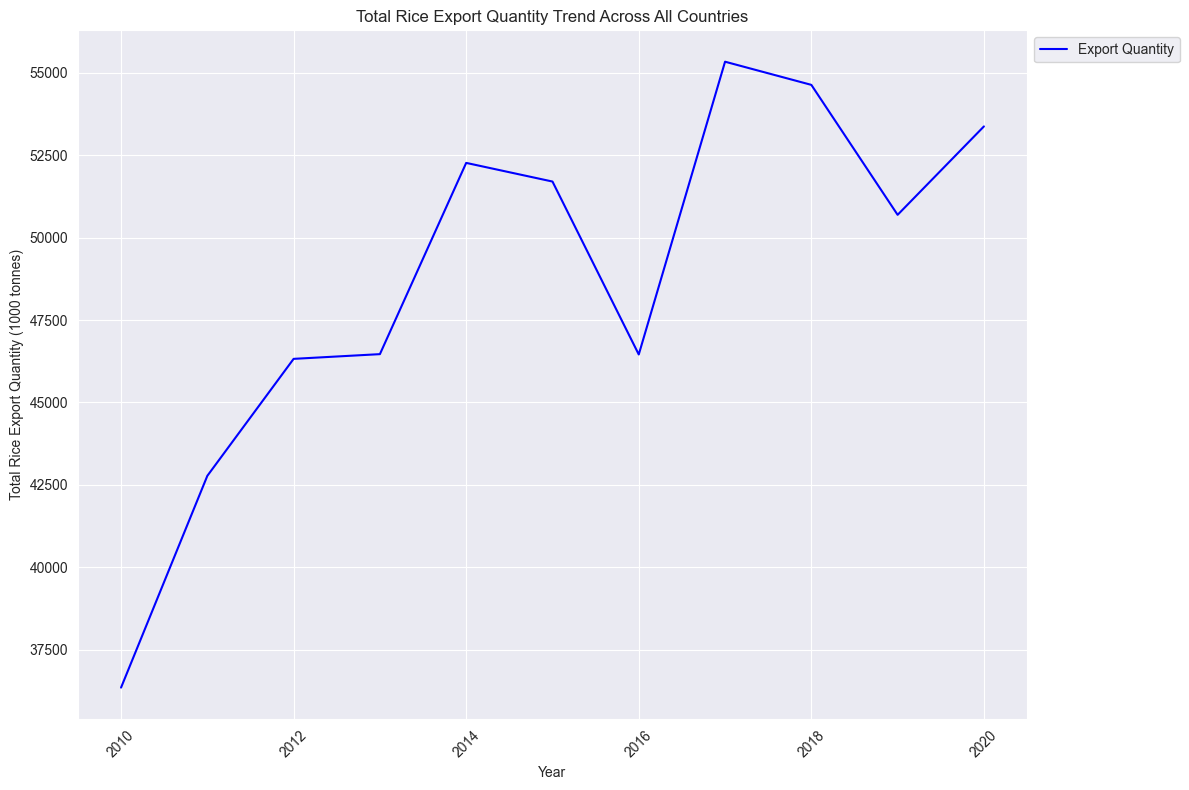

In [164]:
# Filter the DataFrame for rows where the 'Item' is 'Rice and products'
rice_production_df = df[df['Item'] == 'Rice and products']

# Calculate the total export for each year (unit: 1000 tonnes)
total_export_per_year = rice_production_df.groupby('Year')['Export Quantity'].sum().reset_index()

# Set the style of the plot
sns.set_style("darkgrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot the total production trend
plt.plot(total_export_per_year['Year'], total_export_per_year['Export Quantity'], label='Export Quantity', color='blue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Rice Export Quantity (1000 tonnes)')
plt.title('Total Rice Export Quantity Trend Across All Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

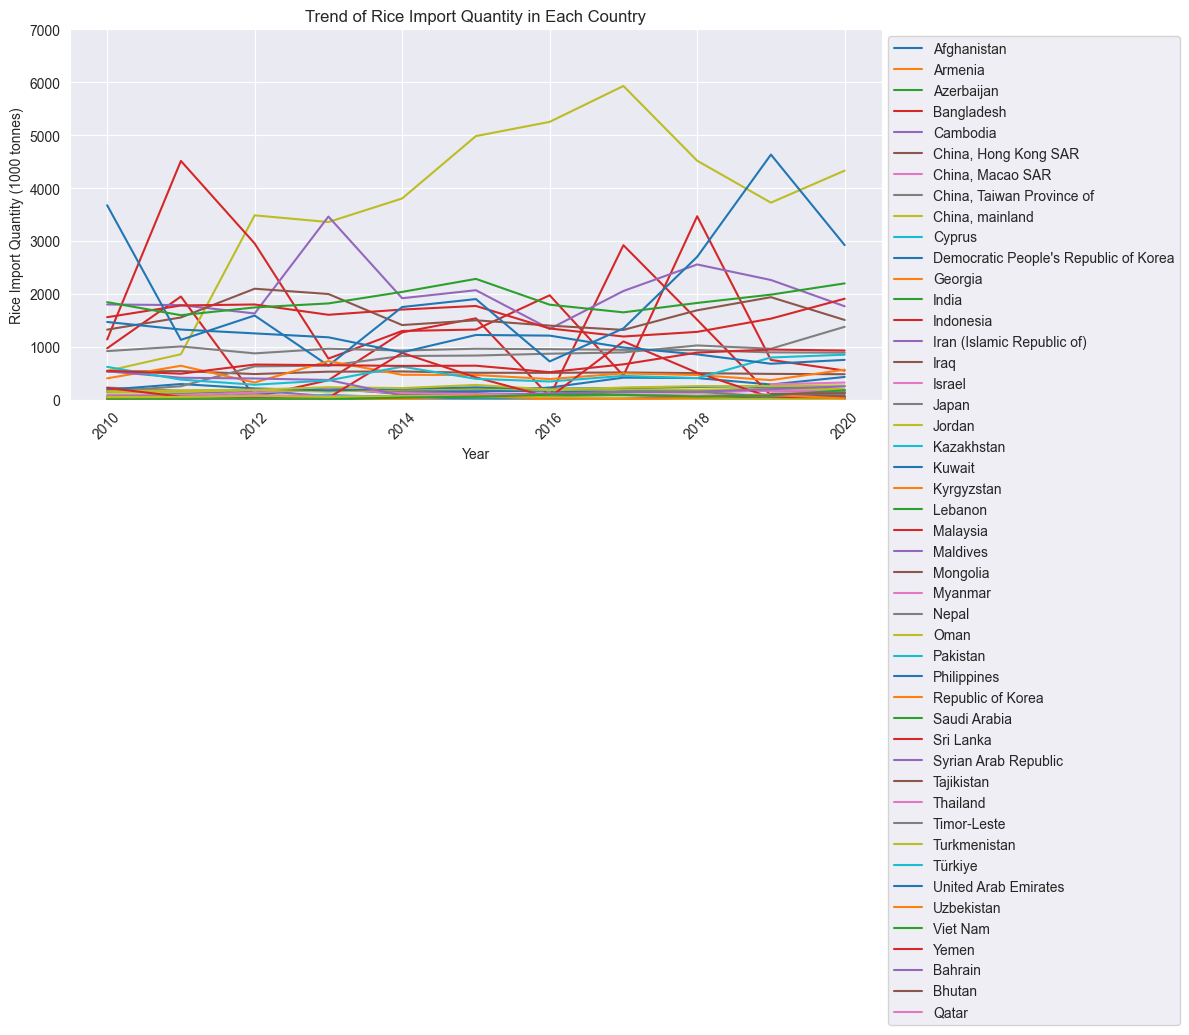

In [166]:
# Filter the DataFrame for rows where the 'Item' is 'Rice and products'
rice_production_df = df[df['Item'] == 'Rice and products']

# Set the style of the plot
sns.set_style("darkgrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Loop through unique countries and plot the import trend for each
for country in rice_production_df['Area'].unique():
    country_data = rice_production_df[rice_production_df['Area'] == country]
    plt.plot(country_data['Year'], country_data['Import Quantity'], label=country)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rice Import Quantity (1000 tonnes)')
plt.ylim(0,7000)
plt.title('Trend of Rice Import Quantity in Each Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

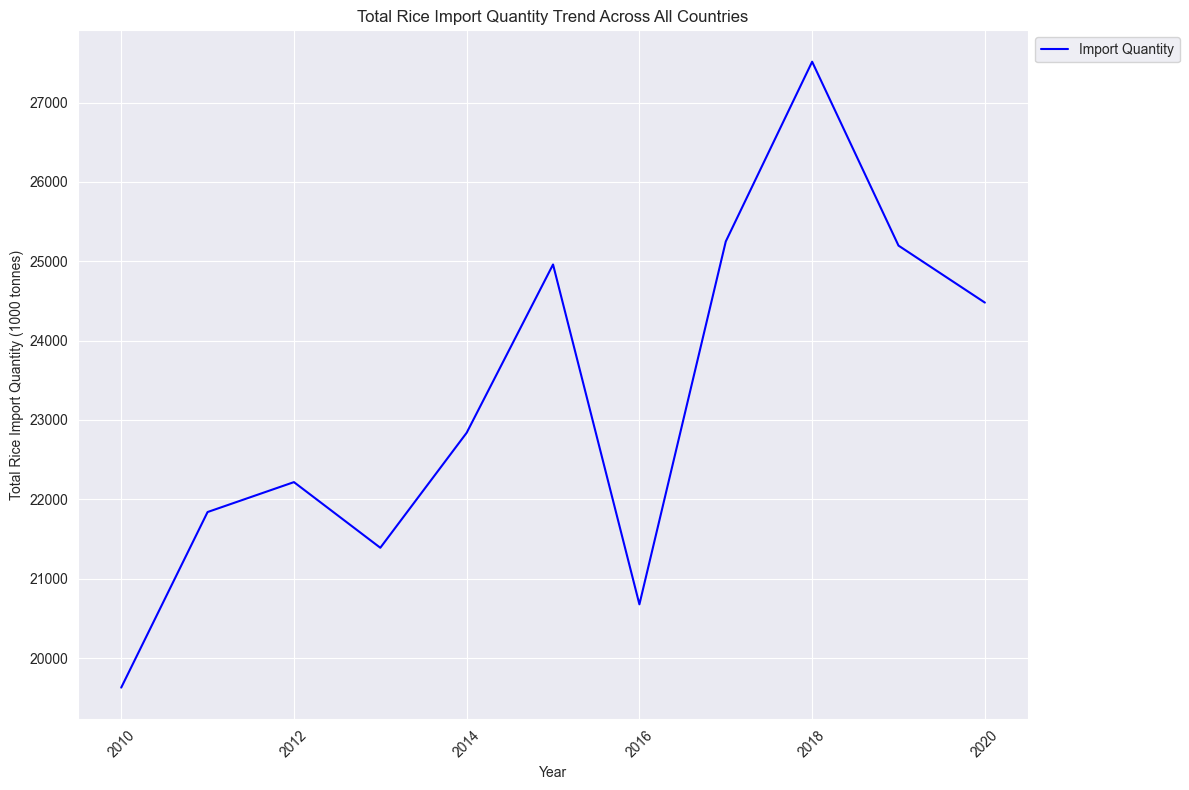

In [167]:
# Filter the DataFrame for rows where the 'Item' is 'Rice and products'
rice_production_df = df[df['Item'] == 'Rice and products']

# Calculate the total export for each year (unit: 1000 tonnes)
total_import_per_year = rice_production_df.groupby('Year')['Import Quantity'].sum().reset_index()

# Set the style of the plot
sns.set_style("darkgrid")

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot the total production trend
plt.plot(total_import_per_year['Year'], total_import_per_year['Import Quantity'], label='Import Quantity', color='blue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Rice Import Quantity (1000 tonnes)')
plt.title('Total Rice Import Quantity Trend Across All Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

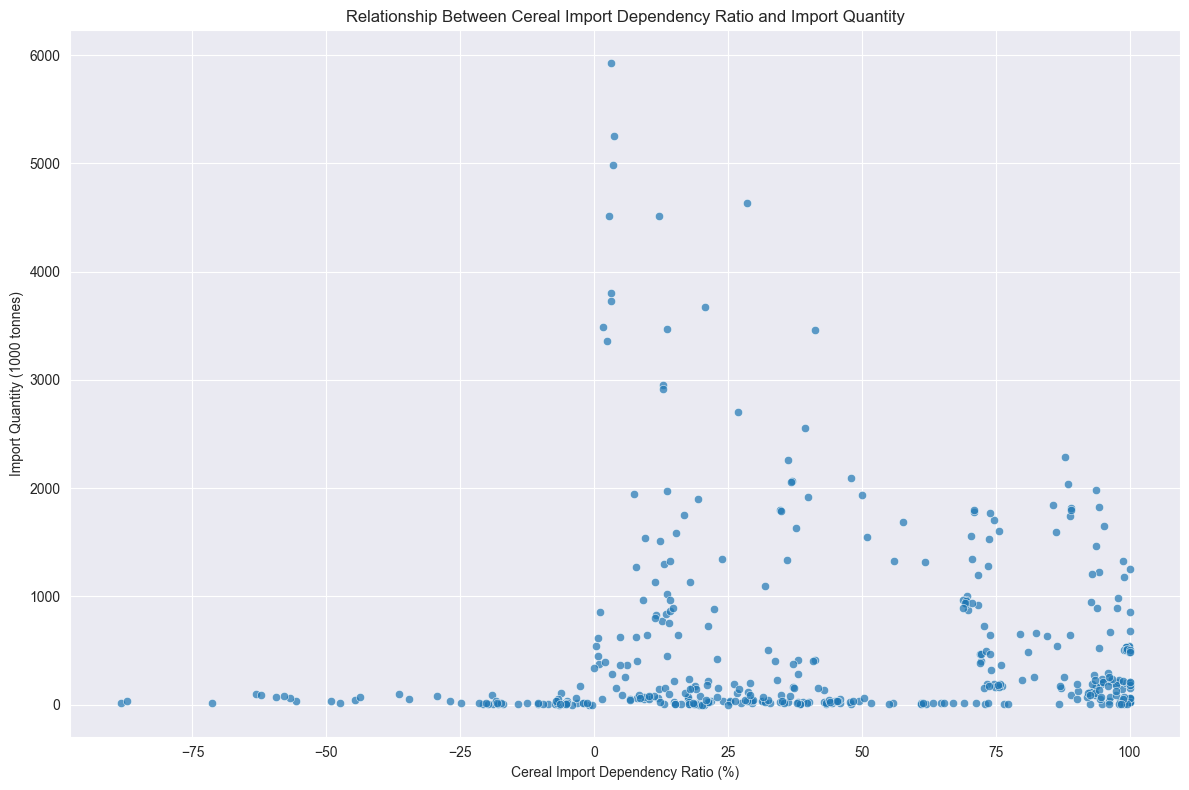

In [171]:
# Filter the data to include only non-null values for the two columns of interest
filtered_df = df.dropna(subset=['Cereal import dependency ratio (percent) (3-year average) (%)', 'Import Quantity'])

# Set the style of the plot
sns.set_style("darkgrid")

# Create a figure and axis for the scatter plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot the relationship between the two variables
sns.scatterplot(x='Cereal import dependency ratio (percent) (3-year average) (%)',
                y='Import Quantity',
                data=filtered_df,
                alpha=0.7)

# Set labels and title
plt.xlabel('Cereal Import Dependency Ratio (%)')
plt.ylabel('Import Quantity (1000 tonnes)')
plt.title('Relationship Between Cereal Import Dependency Ratio and Import Quantity')

# Show the plot
plt.tight_layout()
plt.show()

Trend Prediction Model for the Whole World

In [135]:
df = pd.read_csv('C:/Users/Ying Shan/OneDrive - Universiti Malaya/TFSN/Food Security-Final/food_security.csv')
df_1 = pd.read_csv('C:/Users/Ying Shan/OneDrive - Universiti Malaya/TFSN/Food Security-Final/food_security_other.csv')

In [136]:
df = df.merge(df_1, on=['Area', 'Year'], how='inner')
df = df[df['Item'] != 'Cereals, Other']

In [137]:
df = df[df['Item'] == 'Rice and products']

Model Selecting

Worldwide

In [148]:
# Group data by 'Year' and calculate the total sum of production and the mean SSR for each year
aggregate_df = df.groupby('Year').agg({'SSR': 'mean', 'Production': 'sum'}).reset_index()
aggregate_df.rename(columns={'SSR': 'Mean_SSR', 'Production': 'Total_Production'}, inplace=True)

# Split the data into features (Year) and target variables (Total_Production and Mean_SSR)
X = aggregate_df[['Year']]
y_production = aggregate_df['Total_Production']
y_ssr = aggregate_df['Mean_SSR']

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define your parameter grid to search over
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Example values for the regularization strength
    'fit_intercept': [True, False],  # Example values for the fit_intercept parameter
}

# Create the Ridge model
model = Ridge()

# Create a GridSearchCV instance
grid_search_production = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ssr = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV instance to your data
grid_search_production.fit(X, y_production)
grid_search_ssr.fit(X, y_ssr)

# Get the best parameters and best estimator
best_params_production = grid_search_production.best_params_
best_model_production = grid_search_production.best_estimator_
best_params_ssr = grid_search_ssr.best_params_
best_model_ssr = grid_search_ssr.best_estimator_


In [150]:
print('Production Model:')
print(best_model_production)
print(best_params_production)

print('\nSSR Model:')
print(best_model_ssr)
print(best_params_ssr)

Production Model:
Ridge()
{'alpha': 1.0, 'fit_intercept': True}

SSR Model:
Ridge(alpha=10.0, fit_intercept=False)
{'alpha': 10.0, 'fit_intercept': False}


In [151]:
# Instantiate the Ridge model with the best parameters
best_alpha_production = 1.0  # Replace with the best alpha value obtained from GridSearchCV
best_fit_intercept_production = False  # Replace with the best fit_intercept value obtained from GridSearchCV
best_model_production = Ridge(alpha=best_alpha_production, fit_intercept=best_fit_intercept_production)

best_alpha_ssr = 10.0  # Replace with the best alpha value obtained from GridSearchCV
best_fit_intercept_ssr = False  # Replace with the best fit_intercept value obtained from GridSearchCV
best_model_ssr = Ridge(alpha=best_alpha_ssr, fit_intercept=best_fit_intercept_ssr)

# Fit the best model to your data
best_model_production.fit(X, y_production)
best_model_ssr.fit(X, y_ssr)

# Predict using the best model
predicted_values_production = best_model_production.predict(X)
predicted_values_ssr = best_model_ssr.predict(X)

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the predictions for historical years (for comparison)
historical_production_pred = best_model_production.predict(X)
historical_ssr_pred = best_model_ssr.predict(X)

# Calculate MAE, MSE, and RMSE for Production
mae_production = mean_absolute_error(y_production, historical_production_pred)
mse_production = mean_squared_error(y_production, historical_production_pred)
rmse_production = np.sqrt(mse_production)
r2_production = r2_score(y_production, historical_production_pred)

# Calculate MAE, MSE, and RMSE for SSR
mae_ssr = mean_absolute_error(y_ssr, historical_ssr_pred)
mse_ssr = mean_squared_error(y_ssr, historical_ssr_pred)
rmse_ssr = np.sqrt(mse_ssr)
r2_ssr = r2_score(y_ssr, historical_ssr_pred)

print("Production Metrics:")
print(f"MAE: {mae_production:.2f}")
print(f"MSE: {mse_production:.2f}")
print(f"RMSE: {rmse_production:.2f}")
print(f"R-squared: {r2_production:.2f}")

print("\nSSR Metrics:")
print(f"MAE: {mae_ssr:.2f}")
print(f"MSE: {mse_ssr:.2f}")
print(f"RMSE: {rmse_ssr:.2f}")
print(f"R-squared: {r2_ssr:.2f}")

Production Metrics:
MAE: 9957.70
MSE: 179902545.50
RMSE: 13412.78
R-squared: 0.12

SSR Metrics:
MAE: 3.84
MSE: 26.55
RMSE: 5.15
R-squared: 0.00


In [153]:
# Define future years for prediction (e.g., years after 2020)
future_years = np.arange(2021, 2031).reshape(-1, 1)

# Predict average production and SSR for future years
future_production = best_model_production.predict(future_years)
future_ssr = best_model_ssr.predict(future_years)

c:\Users\Ying Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\Ying Shan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


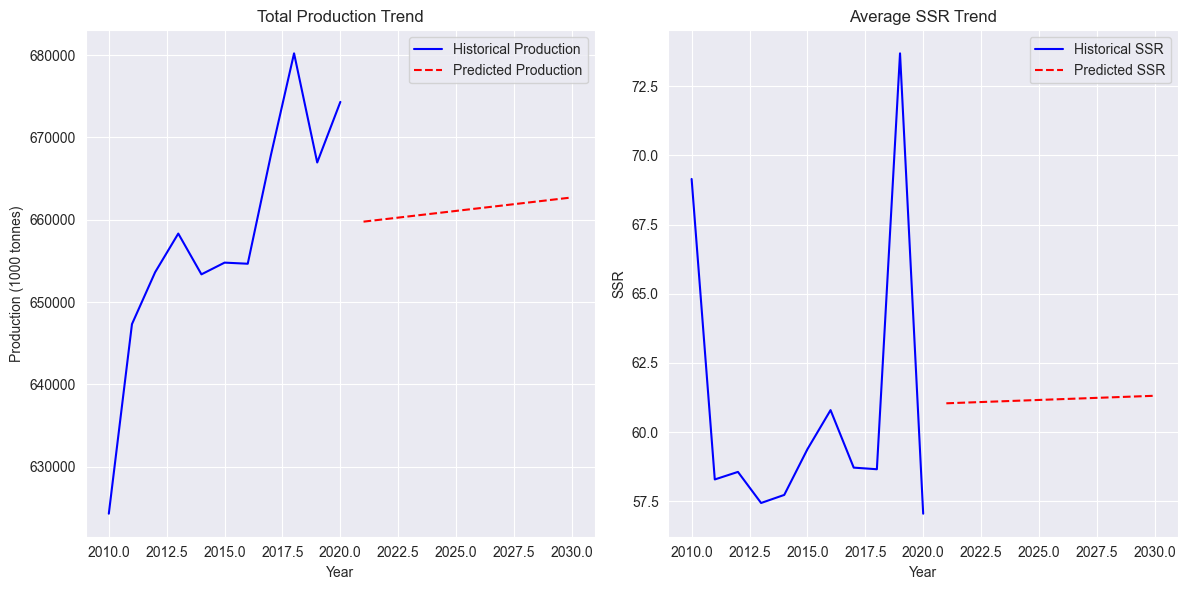

In [156]:
# Create line plots for the predicted trends
plt.figure(figsize=(12, 6))

# Production trend plot
plt.subplot(1, 2, 1)
plt.plot(X, y_production, label='Historical Production', color='blue')
plt.plot(future_years, future_production, label='Predicted Production', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Production (1000 tonnes)')
plt.title('Total Production Trend')
plt.legend()

# SSR trend plot
plt.subplot(1, 2, 2)
plt.plot(X, y_ssr, label='Historical SSR', color='blue')
plt.plot(future_years, future_ssr, label='Predicted SSR', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('SSR')
plt.title('Average SSR Trend')
plt.legend()

plt.tight_layout()
plt.show()

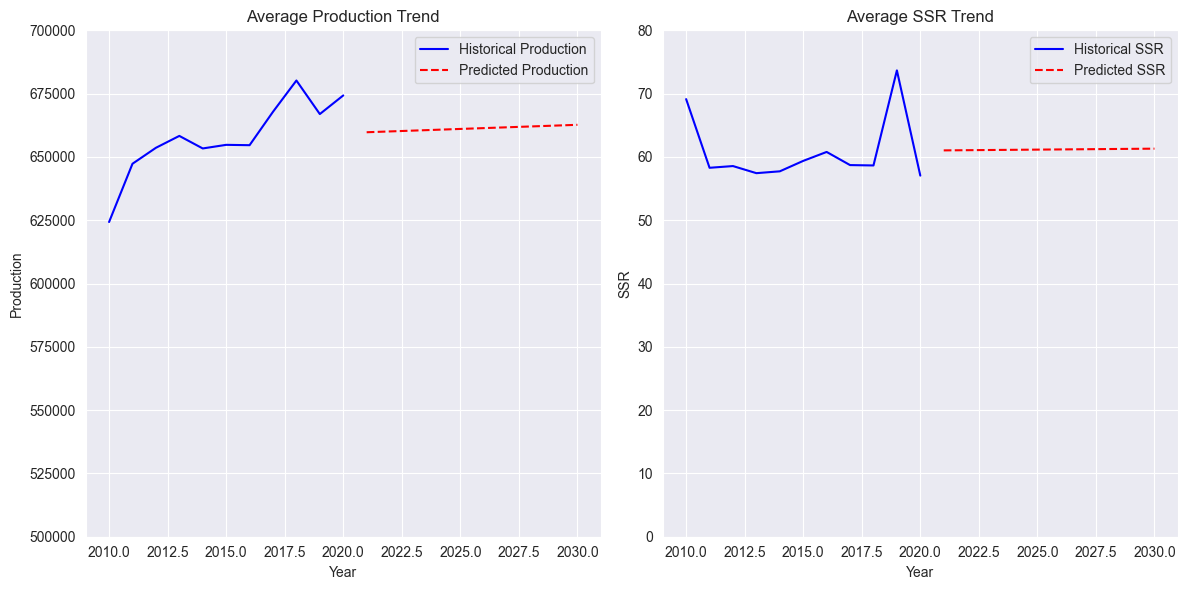

In [160]:
# Create line plots for the predicted trends
plt.figure(figsize=(12, 6))

# Production trend plot
plt.subplot(1, 2, 1)
plt.plot(X, y_production, label='Historical Production', color='blue')
plt.plot(future_years, future_production, label='Predicted Production', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Production')
plt.ylim(500000,700000)
plt.title('Average Production Trend')
plt.legend()

# SSR trend plot
plt.subplot(1, 2, 2)
plt.plot(X, y_ssr, label='Historical SSR', color='blue')
plt.plot(future_years, future_ssr, label='Predicted SSR', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('SSR')
plt.ylim(0,80)
plt.title('Average SSR Trend')
plt.legend()

plt.tight_layout()
plt.show()